# A Quick Hands-on Intro to Deep Learning

Importing necessary utilities from Keras library

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

## Loading the MNIST dataset

Let's explore the dataset

- **MNIST** is a dataset of handwritten digit images ranging from 0 to 9. 
- Each image is of the dimension 28x28. 
- Each pixel value in an image ranges between 0 (black) and 255 (white)
- The dataset contains 70,000 handwritten digits' images. 
- 60,000 images are arranged into training set and the remaining 10,000 images are arranged into test set. 
- Each image is associated with a label from 0 to 9.

<img src="https://cdn-images-1.medium.com/max/1600/1*UKXLbb40YjviJWerqz3D2Q.png"/>

Below, we're loading the dataset using **load_data()** function of **keras.datasets.mnist**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# peeking into the labels
print(y_train[0])
print(y_test[0])

5
7


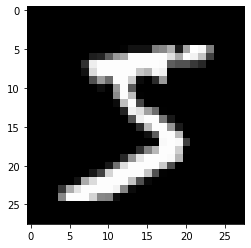

In [5]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

## Data Preparation

Since we're dealing with basic deep neural networks, we'll straigten the 28x28 matrix into one row consisting all the 784 pixel values. We'll also **normalize** the pixel values

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# all the pixel values are between 0 and 1
print(X_train[0, 200:210])

[0.         0.         0.         0.19215687 0.93333334 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686]


In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Defining the model

- 1st layer has 784 nodes
- 2nd layer has 10 nodes mapped to all the possible labels from 0-9

In [12]:
model = Sequential()
model.add(Dense(512, input_dim=num_pixels))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.7992 - accuracy: 0.7882 - val_loss: 0.4628 - val_accuracy: 0.8774
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4330 - accuracy: 0.8803 - val_loss: 0.3761 - val_accuracy: 0.8958
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3779 - accuracy: 0.8926 - val_loss: 0.3424 - val_accuracy: 0.9043
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3522 - accuracy: 0.9000 - val_loss: 0.3262 - val_accuracy: 0.9079
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3365 - accuracy: 0.9049 - val_loss: 0.3161 - val_accuracy: 0.9112
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.9078 - val_loss: 0.3084 - val_accuracy: 0.9137
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.9107 - val_loss: 0.3027 - val_accuracy: 0.9159
Epoch 

# Potting the losses and accuracies of the training process

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss')

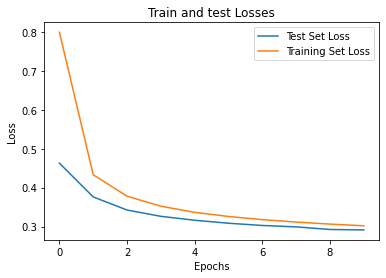

In [17]:

plt.plot(history.history['val_loss'], label="Test Set Loss")
plt.plot(history.history['loss'], label="Training Set Loss")

plt.legend(loc='best')
plt.title("Train and test Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

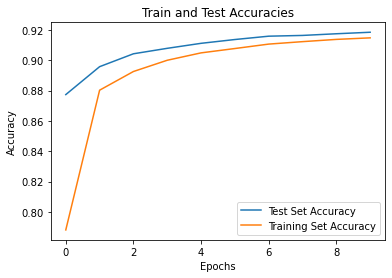

In [18]:
plt.plot(history.history['val_accuracy'], label="Test Set Accuracy")
plt.plot(history.history['accuracy'], label="Training Set Accuracy")

plt.legend(loc='best')
plt.title("Train and Test Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

## Prediction

[[8.1526945e-05 1.4943947e-08 1.9370840e-04 2.3581292e-03 1.1893749e-06
  4.3303222e-05 1.2831995e-08 9.9661595e-01 4.7997386e-05 6.5809715e-04]]

total of probabilities: 0.9999999
Predicted Label: 7
Ground Truth Label: 7


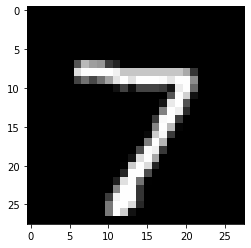

In [19]:
y_pred = model.predict(np.array([X_test[0]]))

print(y_pred)
print("\ntotal of probabilities:", y_pred.sum())
print("Predicted Label:",y_pred.argmax())
print("Ground Truth Label:",y_test[0].argmax())

# Plotting the image
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")
plt.show()